In [1]:
import sys
sys.path.append("../../src")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from exact_solution import solve_master_equation, one_excited_emitter_state

In [2]:
# hand-compiled
def load_data(file_path):
    data = {f"{i:04b}": [] for i in range(16)}
    with open(file_path, 'r') as fp:
        lines = fp.readlines()

    for line in lines:
        if not line:
            continue
        l = line.strip().lstrip('[').rstrip(']')
        for l, v in zip(data.values(), l.split(',')):
            l.append(float(v.strip(' ')))

    return data

jaqal_results = load_data('./exp_data.txt')
jaqal_results = pd.DataFrame(jaqal_results)

In [3]:
# SUPERSTAQ RAW
run1 = np.load('./superstaq 2000 shots/Experiment Probabilities_1.npy', allow_pickle=True) 
run2 = np.load('./superstaq 2000 shots/Experiment Probabilities_2.npy', allow_pickle=True)
run3 = np.load('./superstaq 2000 shots/Experiment Probabilities_3.npy', allow_pickle=True)

lines = []
for timestep in zip(run1, run2, run3):
    timestep_data = {key: _ for key in timestep[0].keys()}
    for key, _ in timestep_data.items():
        timestep_data[key] = (np.mean([timestep[0][key], timestep[1][key], timestep[2][key]]))
    lines.append(timestep_data)
    
superstaq_results = pd.DataFrame(lines)

In [4]:
# mirror swaps, 3 runs of 2000 shots
run1 = np.load('./mirror_swaps/Experiment Probabilities.npy', allow_pickle=True) 
run2 = np.load('./mirror_swaps/Experiment Probabilities (1).npy', allow_pickle=True)
run3 = np.load('./mirror_swaps/Experiment Probabilities (1).npy', allow_pickle=True)

lines = []
for timestep in zip(run1, run2, run3):
    timestep_data = {key: _ for key in timestep[0].keys()}
    for key, _ in timestep_data.items():
        timestep_data[key] = (np.mean([timestep[0][key], timestep[1][key], timestep[2][key]]))
    lines.append(timestep_data)
    
mirror_results = pd.DataFrame(lines)

In [5]:
rms = {
    "Emitter 1": [],
    "Emitter 2": [],
    "Emitter 3": [],
    "Cavity + Environment": [],
}

# qutip simulation

In [6]:
N = 3
g = 2
kappa = 5
times = np.linspace(0, 3, 51)

In [7]:
initial_state = one_excited_emitter_state(N, 1)
qutip_results = solve_master_equation(N, g, kappa, initial_state, times)

# JAQAL hand compiled

In [8]:
jaqal_bitstrs = {
    "Emitter 1": "0010",
    "Emitter 2": "0100",
    "Emitter 3": "1000",
    "Cavity + Environment": "0001",
}

Emitter 1 RMS 0.9646333402506285
Emitter 2 RMS 0.12868259920681202
Emitter 3 RMS 0.481097237818942
Cavity + Environment RMS 1.361409947293122


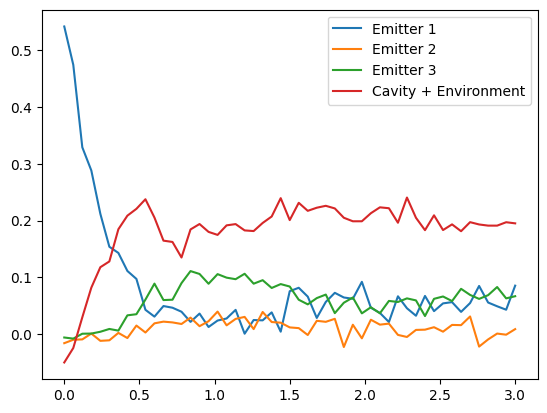

In [9]:
for col, bitstr in jaqal_bitstrs.items():
    diff = qutip_results[col] - np.array(jaqal_results[bitstr])
    print(col, "RMS", np.sqrt(np.sum(diff**2)))
    rms[col].append(np.sqrt(np.sum(diff**2)))
    plt.plot(times, diff, label=col)

plt.legend()

## normed

In [10]:
jaqal_results_norm = jaqal_results.copy()
jaqal_results_norm[['1000', '0100', '0010', '0001']] = jaqal_results_norm[['1000', '0100', '0010', '0001']].divide(jaqal_results_norm[['1000', '0100', '0010', '0001']].sum(axis=1), axis=0)
jaqal_results_norm['avg_0100_0010'] = jaqal_results_norm[['0100', '0010']].mean(axis=1)

Emitter 1 RMS 0.9918295305799886
Emitter 2 RMS 0.30009236838387016
Emitter 3 RMS 0.31811716366473625
Cavity + Environment RMS 0.9618517633404088


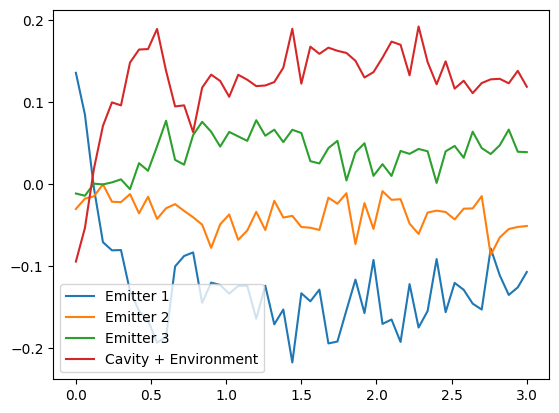

In [11]:
for col, bitstr in jaqal_bitstrs.items():
    diff = qutip_results[col] - np.array(jaqal_results_norm[bitstr])
    print(col, "RMS", np.sqrt(np.sum(diff**2)))
    rms[col].append(np.sqrt(np.sum(diff**2)))
    plt.plot(times, diff, label=col)

plt.legend()

# SUPERSTAQ compiled

In [12]:
superstaq_bitstrs = {
    "Emitter 1": "1000",
    "Emitter 2": "0100",
    "Emitter 3": "0010",
    "Cavity + Environment": "0001",
}

Emitter 1 RMS 0.7659728729022024
Emitter 2 RMS 0.30473179889369634
Emitter 3 RMS 0.31833844694216573
Cavity + Environment RMS 0.5099144286086992


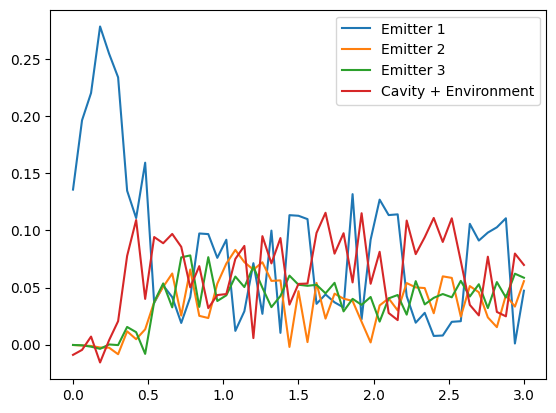

In [13]:
for col, bitstr in superstaq_bitstrs.items():
    diff = qutip_results[col] - np.array(superstaq_results[bitstr])
    print(col, "RMS", np.sqrt(np.sum(diff**2)))
    rms[col].append(np.sqrt(np.sum(diff**2)))
    plt.plot(times, diff, label=col)

plt.legend()

## normalized and averaged

In [14]:
superstaq_results_norm = superstaq_results.copy()
superstaq_results_norm[['1000', '0100', '0010', '0001']] = superstaq_results_norm[['1000', '0100', '0010', '0001']].divide(superstaq_results_norm[['1000', '0100', '0010', '0001']].sum(axis=1), axis=0)
superstaq_results_norm['avg_0100_0010'] = superstaq_results_norm[['0100', '0010']].mean(axis=1)

Emitter 1 RMS 0.4295665243147263
Emitter 2 RMS 0.19194410587780467
Emitter 3 RMS 0.19736159768084835
Cavity + Environment RMS 0.27265307428910496


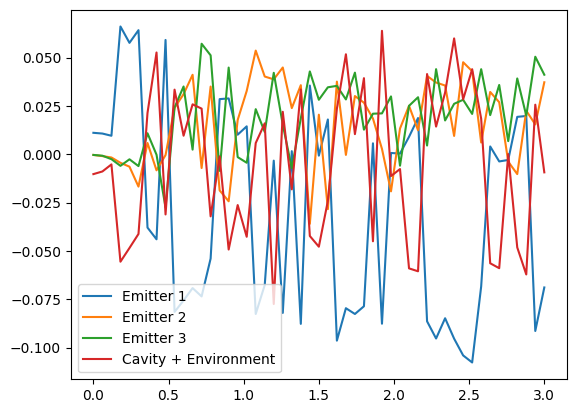

In [15]:
for col, bitstr in superstaq_bitstrs.items():
    diff = qutip_results[col] - np.array(superstaq_results_norm[bitstr])
    print(col, "RMS", np.sqrt(np.sum(diff**2)))
    rms[col].append(np.sqrt(np.sum(diff**2)))
    plt.plot(times, diff, label=col)

plt.legend()

# Mirror swaps

In [16]:
mirror_bitstrs = {
    "Emitter 1": "1000",
    "Emitter 2": "0100",
    "Emitter 3": "0010",
    "Cavity + Environment": "0001",
}

Emitter 1 RMS 1.3840911462299577
Emitter 2 RMS 0.13354821987638887
Emitter 3 RMS 0.17450732627448837
Cavity + Environment RMS 0.46742442862562544


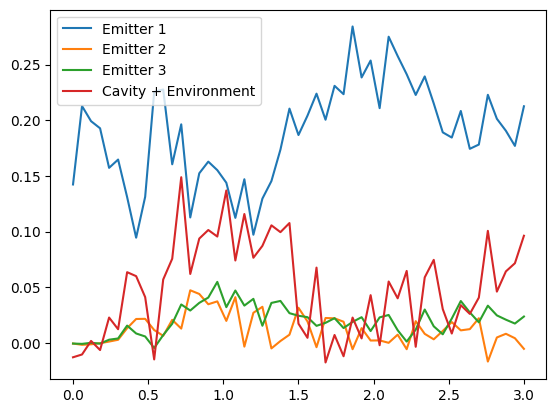

In [17]:
for col, bitstr in mirror_bitstrs.items():
    diff = qutip_results[col] - np.array(mirror_results[bitstr])
    print(col, "RMS", np.sqrt(np.sum(diff**2)))
    rms[col].append(np.sqrt(np.sum(diff**2)))
    plt.plot(times, diff, label=col)

plt.legend()

## normed

In [18]:
mirror_results_norm = mirror_results.copy()
mirror_results_norm[['1000', '0100', '0010', '0001']] = mirror_results_norm[['1000', '0100', '0010', '0001']].divide(mirror_results_norm[['1000', '0100', '0010', '0001']].sum(axis=1), axis=0)
mirror_results_norm['avg_0100_0010'] = mirror_results_norm[['0100', '0010']].mean(axis=1)

Emitter 1 RMS 0.7175361050399898
Emitter 2 RMS 0.262557388597729
Emitter 3 RMS 0.14126384329174005
Cavity + Environment RMS 0.46864626783908847


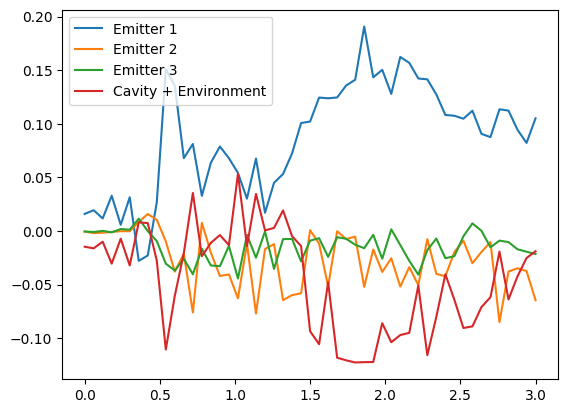

In [19]:
for col, bitstr in mirror_bitstrs.items():
    diff = qutip_results[col] - np.array(mirror_results_norm[bitstr])
    print(col, "RMS", np.sqrt(np.sum(diff**2)))
    rms[col].append(np.sqrt(np.sum(diff**2)))
    plt.plot(times, diff, label=col)

plt.legend()

In [21]:
methods = [
    "jaqal",
    "jaqal_norm",
    "superstaq",
    "superstaq_norm",
    "mirror_swaps",
    "mirror_swaps_norm",
]

pd.DataFrame(rms, index=methods)

,Emitter 1,Emitter 2,Emitter 3,Cavity + Environment
jaqal,0.964633,0.128683,0.481097,1.361410
jaqal_norm,0.991830,0.300092,0.318117,0.961852
superstaq,0.765973,0.304732,0.318338,0.509914
superstaq_norm,0.429567,0.191944,0.197362,0.272653
mirror_swaps,1.384091,0.133548,0.174507,0.467424
mirror_swaps_norm,0.717536,0.262557,0.141264,0.468646
